# Лабораторная работа № 1

### Краткое описание 

В качестве датасета для лабораторной работы был выбран набор из 10000 треков со Spotify, с дополнительной информацией по каждому (например: громкость, длительность, ритм, "танцевальность" и т.д.). 

### Источник данных

Источник данных - https://www.kaggle.com/datasets/byomokeshsenapati/spotify-song-attributes. Автор пишет, что данные были получены через Spotify API, что свиделетьствует об их реальности.

### Атрибуты 

    - название трека (trackName) string
    
    - исполнитель (artistName) string
        
    - жанр (genre) string

    - acousticness (акустичность) float: Мера от 0.0 до 1.0 того, насколько акустическим является трек.
    
    - danceability (танцевальность) float: Мера от 0.0 до 1.0 того, насколько танцевальным является трек.

    - energy (энергичность) float: Мера от 0.0 до 1.0 того, насколько энергичным является трек.
    
    - instrumentalness (инструментальность) float: Мера от 0.0 до 1.0, насколько инструментальным является трек
    
    - key (тональность) int: Тональность трека. Целые числа сопоставляются с тонами с использованием Pitch Class notation. Например, 0 = C, 1 = C♯/D♭, 2 = D и т.д.
    
    - liveness (живой звук) float: Мера от 0.0 до 1.0 того, является ли запись трека "живой" (например, запись с концерта)
    
    - loudness (громкость) float: Громкость трека в децибелах.
    
    - mode (лад) int: Лад трека (Минор = 0, Мажор = 1)
    
    - speachiness (речитатив) float: Мера от 0.0 до 1.0 того, насколько много человеческой речи содержится в треке.
    
    - tempo (ритм) float: Среднее число BPM трека.
    
    - duration_ms (длительность) int: Длительность трека в миллисекундах.
    
    - time_signature (размер такта) int: Условное обозначение, указывающее, сколько долей содержится в каждом такте 
    
    - valence (позитивность) float: Мера от 0,0 до 1,0, описывающая музыкальную позитивность, передаваемую треком.

## Анализ данных

Сперва откроем файл и убедимся, что все атрибуты присутствуют

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import seaborn

file = pd.read_csv("../dataset/spotify.csv")
file.head()

,trackName,artistName,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,"""Honest""",Nico Collins,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,0.0162,0.000000,0.2570,0.577,162.139,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,0.9160,0.956000,0.1010,0.122,112.241,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,0.0164,0.000000,0.3660,0.509,132.012,145611.0,4.0
3,$10,Good Morning,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,0.4750,0.203000,0.1190,0.896,120.969,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,0.0158,0.000169,0.0625,0.507,124.945,280400.0,4.0


Проверим метаинформацию о датасете и количество пустых полей

In [2]:
file.info()
file.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10078 entries, 0 to 10077
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trackName         10078 non-null  object 
 1   artistName        10078 non-null  object 
 2   genre             8578 non-null   object 
 3   danceability      9528 non-null   float64
 4   energy            9528 non-null   float64
 5   key               9528 non-null   float64
 6   loudness          9528 non-null   float64
 7   mode              9528 non-null   float64
 8   speechiness       9528 non-null   float64
 9   acousticness      9528 non-null   float64
 10  instrumentalness  9528 non-null   float64
 11  liveness          9528 non-null   float64
 12  valence           9528 non-null   float64
 13  tempo             9528 non-null   float64
 14  duration_ms       9528 non-null   float64
 15  time_signature    9528 non-null   float64
dtypes: float64(13), object(3)
memory usage: 

trackName              0
artistName             0
genre               1500
danceability         550
energy               550
key                  550
loudness             550
mode                 550
speechiness          550
acousticness         550
instrumentalness     550
liveness             550
valence              550
tempo                550
duration_ms          550
time_signature       550
dtype: int64

Почистим датасет от пустых значений (их достаточно мало, чтобы принебречь)

In [3]:
file = file.dropna()

### Найдем числовые характеристики по атрибутам

Определим среднее и СКО ключевых числовых атрибутов:

In [4]:
# список атрибутов, у которых можно вычислить числовые хар-ки
scalar_attributes = [file['danceability'],
                     file['energy'],
                     file['loudness'],
                     file['speechiness'],
                     file['acousticness'],
                     file['instrumentalness'],
                     file['liveness'],
                     file['valence'],
                     file['tempo'],
                     file['duration_ms']]

for attr in scalar_attributes:
    print(f"{attr.name} mean = {np.mean(attr)}")
    print(f"{attr.name} STD = {np.std(attr)}")
    print("\n")

danceability mean = 0.6018312193984612
danceability STD = 0.15851944310501098


energy mean = 0.566774420610865
energy STD = 0.24162476628687324


loudness mean = -8.579373513639544
loudness STD = 5.328090094965351


speechiness mean = 0.07830270459314526
speechiness STD = 0.07853086511144489


acousticness mean = 0.3579129131172768
acousticness STD = 0.33275224706129797


instrumentalness mean = 0.14937634864070878
instrumentalness STD = 0.3097802777027607


liveness mean = 0.17467666122639308
liveness STD = 0.1309081162919964


valence mean = 0.4356342970389368
valence STD = 0.24277107312950366


tempo mean = 119.14226859407788
tempo STD = 28.968488703505322


duration_ms mean = 203787.80694800653
duration_ms STD = 73400.55455269129




Построим гистограммы распределения значений

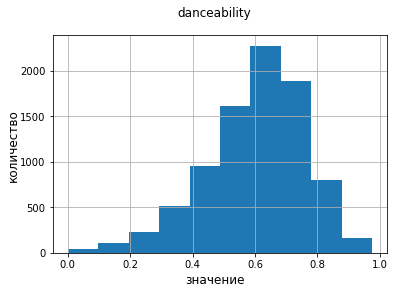

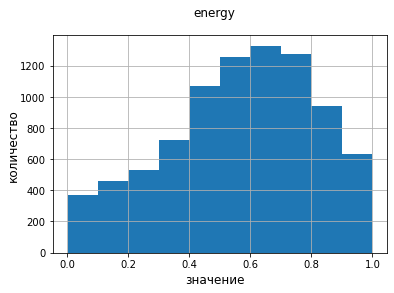

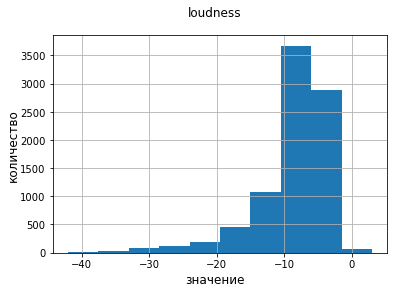

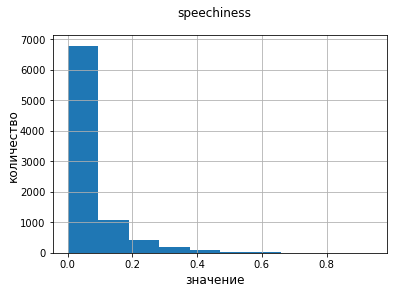

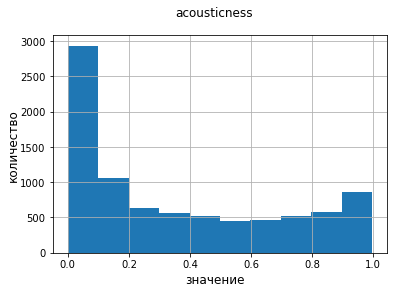

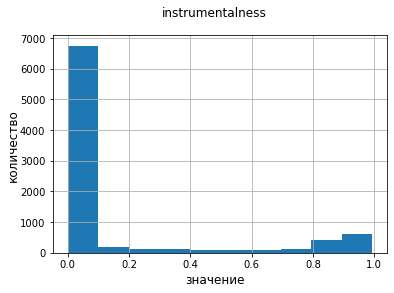

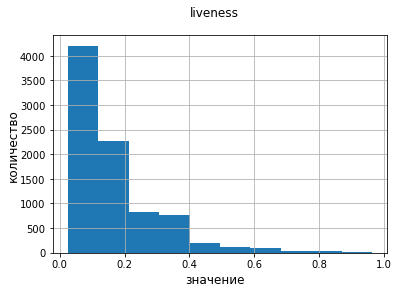

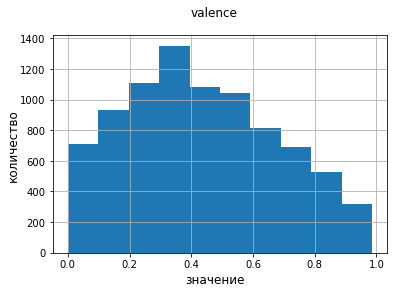

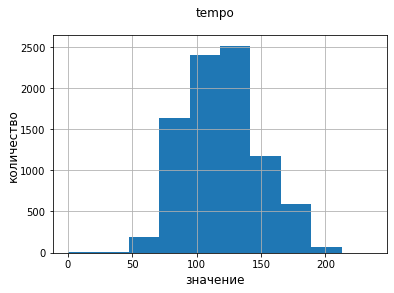

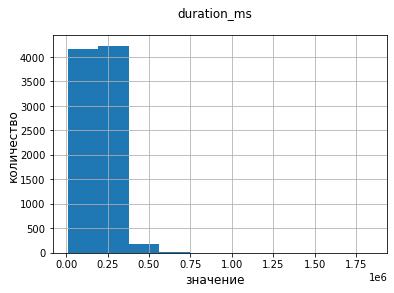

In [5]:
for attr in scalar_attributes:
    fig = plt.figure()
    fig.suptitle(attr.name)
    fig.supxlabel("значение")
    fig.supylabel("количество")
    attr.hist()
    


Выбросы будем определять по Z-оценке (Z-score < 2)

In [6]:
from scipy import stats

for attr in scalar_attributes:
    clean_attr = attr[np.abs(stats.zscore(attr)) < 2]
    print(f"Количество строк с выбросами ({attr.name}): {len(attr)}")
    print(f"Количество строк без выбросов ({attr.name}): {len(clean_attr)}")
    print("\n")


Количество строк с выбросами (danceability): 8578
Количество строк без выбросов (danceability): 8160


Количество строк с выбросами (energy): 8578
Количество строк без выбросов (energy): 8260


Количество строк с выбросами (loudness): 8578
Количество строк без выбросов (loudness): 8144


Количество строк с выбросами (speechiness): 8578
Количество строк без выбросов (speechiness): 8084


Количество строк с выбросами (acousticness): 8578
Количество строк без выбросов (acousticness): 8578


Количество строк с выбросами (instrumentalness): 8578
Количество строк без выбросов (instrumentalness): 7518


Количество строк с выбросами (liveness): 8578
Количество строк без выбросов (liveness): 8166


Количество строк с выбросами (valence): 8578
Количество строк без выбросов (valence): 8396


Количество строк с выбросами (tempo): 8578
Количество строк без выбросов (tempo): 8266


Количество строк с выбросами (duration_ms): 8578
Количество строк без выбросов (duration_ms): 8234




### Определим корреляцию между атрибутами

Сперва построим матрицу графиков рассеивания

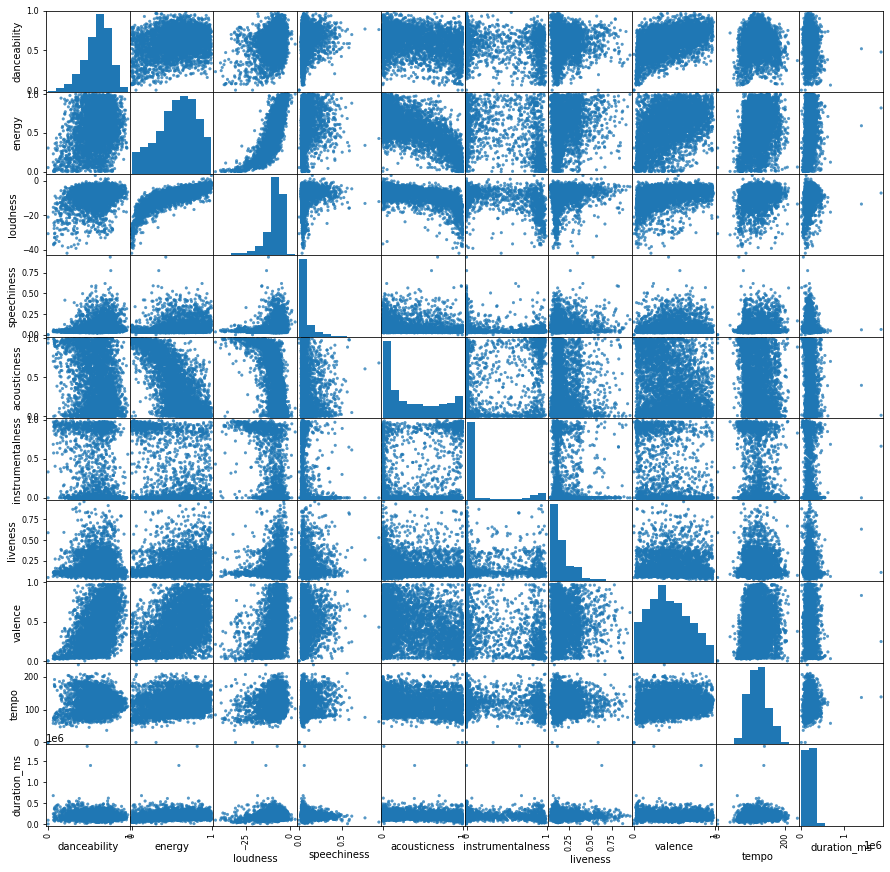

In [7]:
scatter_frame = pd.DataFrame({
    "danceability": scalar_attributes[0],
    "energy": scalar_attributes[1],
    "loudness": scalar_attributes[2],
    "speechiness": scalar_attributes[3],
    "acousticness": scalar_attributes[4],
    "instrumentalness": scalar_attributes[5],
    "liveness": scalar_attributes[6],
    "valence": scalar_attributes[7],
    "tempo": scalar_attributes[8],
    "duration_ms": scalar_attributes[9],
})

scatter_matrix = pd.plotting.scatter_matrix(
    scatter_frame,
    figsize=(15, 15) 
)

Теперь рассмотрим матрицу корреляций

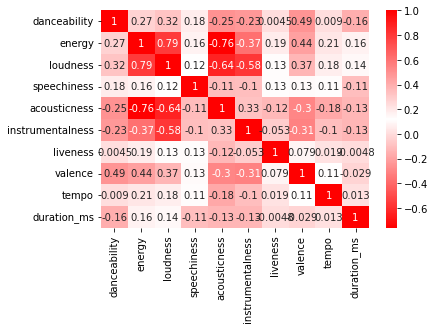

In [8]:
from matplotlib.colors import LinearSegmentedColormap

cmap = LinearSegmentedColormap.from_list('', ['red', 'white', 'red'])
heatmap = seaborn.heatmap(
    scatter_frame.corr(),
    annot=True,
    cmap=cmap
)

### Анализ корреляций

Высокая корреляция (0.6 < abs(corr) < 1): 

    энергичность и громкость (0.79) - прямая корреляция: довольно закономерно, т.к. громкая музыка зачастую очень динамичная и заряжающая
    
    энергичность и акустичность (-0.76) - обратная корреляция: возможно, в данном датасете большинство энергичной музыки - электроника (дабстеп и т.п.)
    
    громкость и акустичность (-0.64) - обратная корреляция: возможно, большая часть акустической музыки в данном датасете действительно крайне спокойна (что соответствует предыдущему наблюдению)

Средняя корреляция (0.3 < abs(corr) < 0.6):

    инструментальность и громкость (-0.58) - обратная корреляция: данное наблюдение все так же подтверждает предположения, видвинутые ранее
    
    инструментальность и энергичность (-0.37) - обратная корреляция
    
    позитивность и танцевальность (0.49) - прямая корреляция
    
    позитивность и энергичность (0.44) - прямая корреляция
    
    позитивность и громкость (0.37) - прямая корреляция
    
    акустичность и инструментальность (0.33) - прямая корреляция
    
    позитивность и инструментальность (-0.31) - обратная корреляция
    
    позитивность и акустичность (-0.3) - обратная корреляция
    
Низкая корреляция (0,1 < abs(corr) < 0.3): 

    танцевальность и энергичность (0.27) - прямая корреляция
    
    танцевальность и акустичность (-0.25) - обратная корреляция
    
    танцевальность и инструментальность (-0.23) - обратная корреляция
    
    длительность и танцевальность (-0.16) - обратная корреляция
    
    наличие речитатива и энергичность (0.16) - прямая корреляция 
    
    энергичность и ритм (0.21) - прямая корреляция 
    
    энергичность и длительность (0.16) - прямая корреляция 
    
    и т.д.
    
Отсутствие корреляции (abs(corr) < 0.1):
    
    длительность и темп
    
    длительность и живой звук
    
    длительность и позитивность
    
    позитивность и живой звук
    
    ритм и живой звук
    
    ритм и танцевальность (что странно)